# ⚡

# <font color=blue > Project:  </font>     <font color=red > Data warehouses </font> 

# ⚡

# <font color="green">Data Exploration</font>

___________

# <font color="blue">Code</font>


_______________

## <font color="orange">Import necessary libraries </font>


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

#### <font color="blue">To verify that the librarys is working properly</font>


In [11]:
print("['The libraries are working properly']")

['The libraries are working properly']


___________

# ✍

Loaded customers - 50 rows
Loaded products - 50 rows
Loaded sales - 50 rows
Loaded dates - 22 rows

--- CUSTOMERS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    50 non-null     int64 
 1   customer_name  50 non-null     object
 2   email          50 non-null     object
 3   phone          50 non-null     object
 4   address        50 non-null     object
 5   city           50 non-null     object
 6   country        50 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.9+ KB
None
       customer_id
count     50.00000
mean      25.50000
std       14.57738
min        1.00000
25%       13.25000
50%       25.50000
75%       37.75000
max       50.00000



--- PRODUCTS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
--

C:\Users\Subeh\AppData\Local\Temp\ipykernel_24300\2760582921.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_sales", y="product_name", data=sales_by_product, palette="Blues_r")


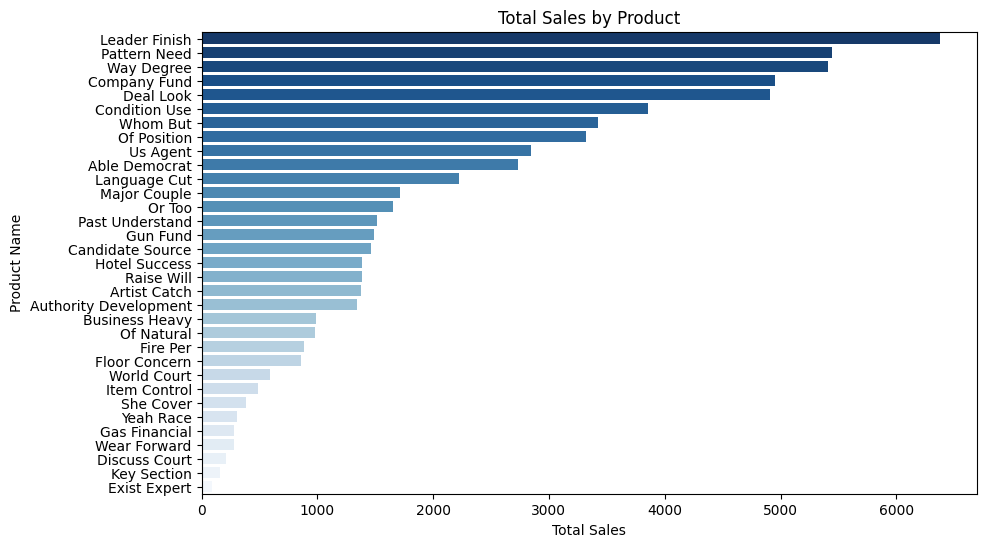

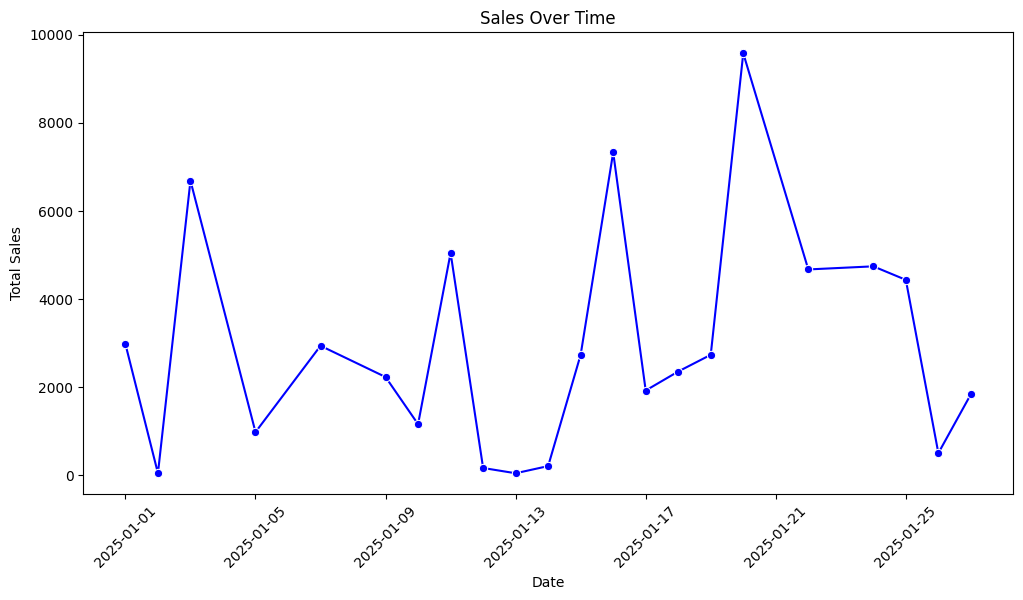

C:\Users\Subeh\AppData\Local\Temp\ipykernel_24300\2760582921.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Monetary", y="customer_name", data=rfm, palette="coolwarm")


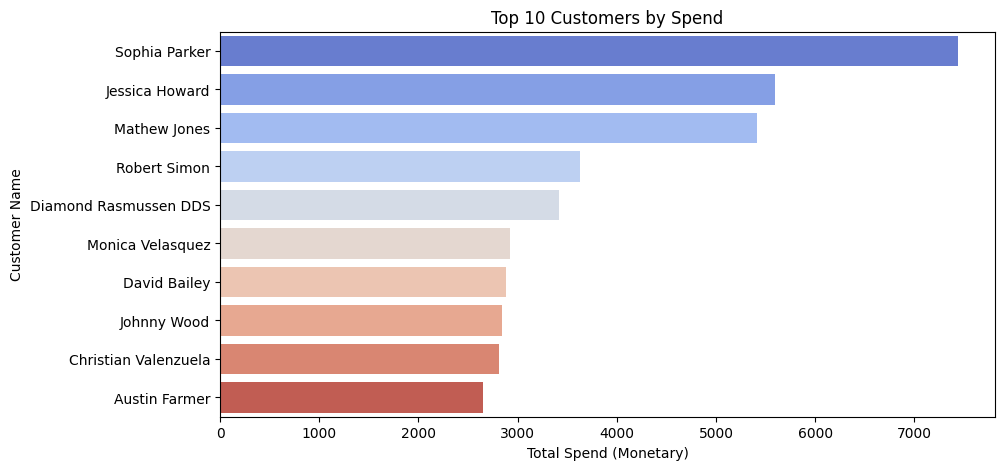

✅ Data exploration completed successfully!


In [12]:
# Database connection settings

host = 'localhost'
user = 'postgres'
password = '123qw'
database = 'data_warehouse'
schema = 'dw_schema'

# Create database engine
engine = create_engine(f'postgresql://{user}:{password}@{host}/{database}')

# Load data from the data warehouse
queries = {
    "customers": f"SELECT * FROM {schema}.dim_customers;",
    "products": f"SELECT * FROM {schema}.dim_products;",
    "sales": f"SELECT * FROM {schema}.fact_sales;",
    "dates": f"SELECT * FROM {schema}.dim_date;"
}

dataframes = {}
for table, query in queries.items():
    dataframes[table] = pd.read_sql(query, engine)
    print(f"Loaded {table} - {dataframes[table].shape[0]} rows")

# Data overview
for name, df in dataframes.items():
    print(f"\n--- {name.upper()} ---")
    print(df.info())
    print(df.describe())
    print("\n")

# Check for missing values
missing_values = {name: df.isnull().sum() for name, df in dataframes.items()}
for name, mv in missing_values.items():
    print(f"Missing values in {name}:\n{mv}\n")

# Sales analysis by product
sales_by_product = pd.read_sql(f"""
    SELECT p.product_name, SUM(s.total_price) AS total_sales
    FROM {schema}.fact_sales s
    JOIN {schema}.dim_products p ON s.product_id = p.product_id
    GROUP BY p.product_name
    ORDER BY total_sales DESC;
""", engine)

plt.figure(figsize=(10, 6))
sns.barplot(x="total_sales", y="product_name", data=sales_by_product, palette="Blues_r")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Total Sales by Product")
plt.show()

# Sales analysis over time
sales_by_date = pd.read_sql(f"""
    SELECT d.full_date, SUM(s.total_price) AS total_sales
    FROM {schema}.fact_sales s
    JOIN {schema}.dim_date d ON s.date_id = d.date_id
    GROUP BY d.full_date
    ORDER BY d.full_date;
""", engine)

plt.figure(figsize=(12, 6))
sns.lineplot(x="full_date", y="total_sales", data=sales_by_date, marker="o", color="b")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Over Time")
plt.xticks(rotation=45)
plt.show()

# RFM analysis (top customers by value)
rfm = pd.read_sql(f"""
    SELECT c.customer_name,
           COUNT(s.sale_id) AS frequency,
           SUM(s.total_price) AS monetary
    FROM {schema}.fact_sales s
    JOIN {schema}.dim_customers c ON s.customer_id = c.customer_id
    GROUP BY c.customer_name
    ORDER BY monetary DESC
    LIMIT 10;
""", engine)

# Rename columns for consistency in visualization
rfm.rename(columns={"frequency": "Frequency", "monetary": "Monetary"}, inplace=True)

# Plot data
plt.figure(figsize=(10, 5))
sns.barplot(x="Monetary", y="customer_name", data=rfm, palette="coolwarm")
plt.xlabel("Total Spend (Monetary)")
plt.ylabel("Customer Name")
plt.title("Top 10 Customers by Spend")
plt.show()

print("✅ Data exploration completed successfully!")


_____________

# ✔✔